# Manipulating Experiments

The MouseConnectivityCache AllenSDK class provides methods for downloading metadata about experiments, including their viral injection site and the mouse's transgenic line.  You can request information either as a Pandas DataFrame or a simple list of dictionaries.  This demonstrates the former.

An important feature of the MouseConnectivityCache is how it stores and retrieves data for you.  By default, it will create (or read) a manifest file that keeps track of where various connectivity atlas data are stored.  If you request something that has not already been downloaded, it will download it and store it in a well known location.  

The hard drives provided to you have a connectivity atlas manifest that indexes a the majority of the connectivity atlas data, including gridded projection volumes at 25um.  The script that downloaded all of this data is also provided.

In [1]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

# the manifest file is a simple JSON file that keeps track of all of
# the data that has already been downloaded onto the hard drives 
# we have provided for you.
mcc = MouseConnectivityCache(manifest_file='manifest.json')

# open up a list of all of the experiments
all_experiments = mcc.get_experiments(dataframe=True)
print "%d total experiments" % len(all_experiments)

# take a look at what we know about an experiment with a primary motor injection
all_experiments.loc[122642490]

2173 total experiments


gender                                                                   M
id                                                               122642490
injection-coordinates                                   [4020, 2160, 6870]
injection-structures     [{u'abbreviation': u'MOp', u'color': u'1F9D5A'...
injection-volume                                                  0.151085
name                                                          Syt6-Cre-585
num-voxels                                                          483853
strain                                                               B6.Cg
structure-abbrev                                                       MOp
structure-color                                                     1F9D5A
structure-id                                                           985
structure-name                                          Primary motor area
sum                                                                1.52087
transgenic-line          

MouseConnectivityCache has a method for retrieving the adult mouse structure ontology as an Ontology class instance.  This is a light wrapper around a Pandas DataFrame of structures that provides some helper methods for figuring out which structures are parents/children of each other.  It's also handy for finding the ID of a structure by its acronym.

In [2]:
# grab the Ontology instance
ontology = mcc.get_ontology()

# get some info on the isocortex
isocortex = ontology['Isocortex']
isocortex

,acronym,atlas_id,color_hex_triplet,depth,failed,failed_facet,graph_id,graph_order,hemisphere_id,id,...,neuro_name_structure_id,neuro_name_structure_id_path,ontology_id,parent_structure_id,safe_name,sphinx_id,st_level,structure_id_path,structure_name_facet,weight
id,,,,,,,,,,,,,,,,,,,,,
315,Isocortex,746,70FF71,5,False,734881840,1,5,3,315,...,NaN,NaN,1,695,Isocortex,6,NaN,/997/8/567/688/695/315/,2323732626,8690


On the connectivity atlas web site, you'll see that we show most of our data at a fairly coarse structure level.  We did this by creating a "structure set" of ~300 structures.  If you want to filter your ontology structures down to that list, you can do this:

In [3]:
from allensdk.api.queries.structure.ontologies_api import OntologiesApi

# get the adult mouse structures summary structures
summary_structures = OntologiesApi().get_structures(structure_set_names='Mouse Connectivity - Summary')

summary_structure_ids = [ s['id'] for s in summary_structures ]

ontology[summary_structure_ids]

,acronym,atlas_id,color_hex_triplet,depth,failed,failed_facet,graph_id,graph_order,hemisphere_id,id,...,neuro_name_structure_id,neuro_name_structure_id_path,ontology_id,parent_structure_id,safe_name,sphinx_id,st_level,structure_id_path,structure_name_facet,weight
id,,,,,,,,,,,,,,,,,,,,,
1,TMv,424,FF4C3E,8,False,734881840,1,710,3,1,...,NaN,NaN,1,557,Tuberomammillary nucleus ventral part,711,NaN,/997/8/343/1129/1097/467/331/557/1/,3678649713,8690
1027,AUDpo,835,019399,7,False,734881840,1,126,3,1027,...,NaN,NaN,1,247,Posterior auditory area,127,NaN,/997/8/567/688/695/315/247/1027/,57661303,8690
4,IC,141,FF7AFF,5,False,734881840,1,746,3,4,...,NaN,NaN,1,339,Inferior colliculus,747,NaN,/997/8/343/313/339/4/,3456805092,8690
1029,POL,269,FF909F,7,False,734881840,1,615,3,1029,...,NaN,NaN,1,138,Posterior limiting nucleus of the thalamus,616,NaN,/997/8/343/1129/549/856/138/1029/,3921343755,8690
1031,GPi,128,8599CC,6,False,734881840,1,560,3,1031,...,NaN,NaN,1,818,Globus pallidus internal segment,561,NaN,/997/8/567/623/803/818/1031/,2033111499,8690
1033,COPY,411,FFFC91,5,False,734881840,1,994,3,1033,...,NaN,NaN,1,1073,Copula pyramidis,995,NaN,/997/8/512/528/1073/1033/,2916242466,8690
523,MPO,206,FF5547,6,False,734881840,1,684,3,523,...,NaN,NaN,1,141,Medial preoptic area,685,NaN,/997/8/343/1129/1097/141/523/,1992330649,8690
12,IF,142,FFA6FF,6,False,734881840,1,796,3,12,...,NaN,NaN,1,165,Interfascicular nucleus raphe,797,NaN,/997/8/343/313/348/165/12/,1057138099,8690
1037,POST,270,48C83C,7,False,734881840,1,488,3,1037,...,NaN,NaN,1,822,Postsubiculum,489,NaN,/997/8/567/688/695/1089/822/1037/,2028146433,8690


This is how you can filter experiments by transgenic line:

In [4]:
# fetch the experiments that have injections in the isocortex of cre-positive mice
cre_cortical_experiments = mcc.get_experiments(cre=True, 
                                               injection_structure_ids=isocortex['id'])

print "%d cre cortical experiments" % len(cre_cortical_experiments)

# find all of the Rbp4 experiments
cre_line = 'Rbp4-Cre_KL100'
rbp4_experiments = [ e for e in cre_cortical_experiments 
                    if e['transgenic-line'] == cre_line ]

print "%d Rbp4 experiments" % len(rbp4_experiments)

612 cre cortical experiments
55 Rbp4 experiments


# Signal Unionization

The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment.  It contains the density of projecting signal, volume of projecting signal, and other information.  MouseConnectivityCache provides methods for querying and storing this data.

In [5]:
visp = ontology['VISp']
visp_experiments = mcc.get_experiments(cre=False, 
                                       injection_structure_ids=visp['id'])

print "%d VISp experiments" % len(visp_experiments)

structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in visp_experiments ], 
                                                  is_injection=False,
                                                  structure_ids=isocortex['id'])

print "%d VISp non-injection, cortical structure unionizes" % len(structure_unionizes)

32 VISp experiments
27840 VISp non-injection, cortical structure unionizes


In [6]:
structure_unionizes

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,3,466802104,False,1.000000,10140,1490,7680,0.045834,0.067916,120.268000,1770.830,3.666620e-02,180296424,442,1.353400e+11,440712000,5.300370e+10,2.993160e+07,0.539872
1,3,466802595,False,0.361521,4800,2840,8160,0.000149,0.000087,0.031525,361.665,1.192570e-04,180296424,1102,2.371280e+11,1116870000,3.520900e+07,9.735250e+04,1.368160
2,3,466802641,False,0.998660,8120,1830,8920,0.008150,0.138228,157.277000,1137.810,6.519820e-03,180296424,312782624,1.556250e+10,38503800,6.055750e+09,5.322300e+06,0.047167
3,2,466801549,False,0.517563,6530,4610,9600,0.000213,0.007225,3.065770,424.333,1.703020e-04,180296424,849,2.487860e+09,19242000,5.899160e+07,1.390220e+05,0.023571
4,3,466802487,False,0.178821,4740,2960,9310,0.000006,0.000005,0.002624,498.282,5.168790e-06,180296424,950,2.640480e+11,801248000,2.102460e+06,4.219420e+03,0.981529
5,1,466800731,False,0.714281,8310,820,4380,0.004481,0.016841,9.103330,540.531,3.585070e-03,180296424,774,3.999920e+10,173773000,1.581910e+09,2.926590e+06,0.212872
6,1,466800580,False,0.635501,8120,690,4100,0.009341,0.051480,33.828600,657.116,7.472350e-03,180296424,565,3.452200e+10,118490000,4.008330e+09,6.099880e+06,0.145150
7,1,466800912,False,0.700408,4340,2120,5200,0.000733,0.001560,0.734970,471.269,5.865830e-04,180296424,1015,7.725300e+10,307039000,2.256640e+08,4.788430e+05,0.376122
8,1,466800945,False,0.417395,7870,1950,2390,0.000714,0.004476,1.719120,384.104,5.713050e-04,180296424,1062,1.379890e+10,104202000,1.791350e+08,4.663720e+05,0.127647
9,2,466801357,False,1.000000,9830,1760,9280,0.209088,0.106538,135.337000,1270.320,1.672660e-01,180296424,541,4.517480e+11,1281640000,1.734540e+11,1.365440e+08,1.570010


In [7]:
dense_unionizes = structure_unionizes[ structure_unionizes.projection_density > .5 ]
large_unionizes = dense_unionizes[ dense_unionizes.volume > .5 ]
large_structures = ontology[large_unionizes.structure_id]

print "%d large, dense, cortical, non-injection unionizes, %d structures" % ( len(large_unionizes), len(large_structures) )

print large_structures.name

large_unionizes

23 large, dense, cortical, non-injection unionizes, 8 structures
id
33                  Primary visual area, layer 6a
312782628                         Postrhinal area
417                     Rostrolateral visual area
425                    Posterolateral visual area
312782574                 Laterointermediate area
22           Posterior parietal association areas
409                           Lateral visual area
669                                  Visual areas
Name: name, dtype: object


,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
39,3,466802085,False,1,9710,2040,1740,0.687285,0.529886,2256.86,4259.15,0.549813,180296424,409,2.068930e+12,847026000,1.911620e+12,448827000,1.037610
219,2,466801771,False,1,9410,2500,9080,0.597458,0.835835,4615.01,5521.43,0.477953,180296424,312782628,2.205160e+12,466797000,2.154270e+12,390166000,0.571827
616,3,466802642,False,1,9790,2150,1700,0.761375,0.523711,2418.87,4618.72,0.609083,180296424,312782628,2.469310e+12,949400000,2.296480e+12,497211000,1.163010
640,3,466802093,False,1,9840,2070,1760,0.385286,0.507268,1933.31,3811.22,0.308221,180296424,425,1.067280e+12,496007000,9.589370e+11,251609000,0.607608
778,2,466801045,False,1,9560,1360,7700,0.493331,0.619365,2160.03,3487.49,0.394654,180296424,33,1.253770e+12,520156000,1.123550e+12,322166000,0.637191
781,2,466801434,False,1,9120,430,7000,4.282840,0.522578,2109.36,4036.45,3.426180,180296424,669,1.258740e+13,5352090000,1.128950e+13,2796880000,6.556300
1385,2,468716555,False,1,9410,2500,9080,0.384089,0.703545,4746.31,6746.28,0.415927,309004492,312782628,2.462820e+12,482602000,2.290580e+12,339533000,0.591188
1672,3,468717338,False,1,9310,2520,9140,0.247361,0.500414,3419.28,6832.92,0.267866,309004492,312782574,1.597700e+12,436971000,1.494130e+12,218666000,0.535289
2282,2,464590260,False,1,7890,1480,8340,0.309360,0.511926,1307.37,2553.82,0.280996,309372716,417,6.881910e+11,448082000,5.858080e+11,229385000,0.548900
2387,2,464589276,False,1,8350,1210,7550,0.341720,0.592527,1758.98,2968.60,0.310390,309372716,33,8.231460e+11,427625000,7.521820e+11,253379000,0.523841


# Manipulating Grid Data

The MouseConnectivity class also helps you download and open every experiment's projection grid data volume.  For this course, we've provided you with the 25um volumes.  You could also download data at other resolutions if you prefer (10um, 50um, 100um).

This demonstrates how you can load the projection density for a particular experiment.  It also shows how to download the template volume to which all grid data is registered.  Voxels in that template have been structurally annotated by neuroanatomists and stored in a separate annotation volume image.

In [8]:
pd, pd_info = mcc.get_projection_density(122642490)
template, template_info = mcc.get_template_volume()
annot, annot_info = mcc.get_annotation_volume()

print pd_info
print pd.shape, template.shape, annot.shape

{u'space origin': ['0', '0', '0'], u'space directions': [['25', '0', '0'], ['0', '25', '0'], ['0', '0', '25']], u'sizes': [528, 320, 456], u'space': 'left-posterior-superior', u'encoding': 'gzip', 'keyvaluepairs': {}, u'endian': 'little', u'kinds': ['domain', 'domain', 'domain'], u'type': 'float', u'dimension': 3}
(528L, 320L, 456L) (528L, 320L, 456L) (528L, 320L, 456L)


Once you have these loaded, you can use matplotlib see what they look like.  

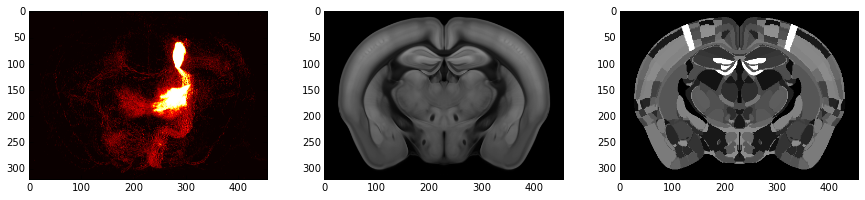

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# compute the maximum intensity projection of the projection density
pd_mip = pd.max(axis=0)

# pick a slice to show
slice_idx = 264

# show that slice of all three volumes side-by-side
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,3))
ax1.imshow(pd_mip, cmap='hot', aspect='equal')
ax2.imshow(template[slice_idx,:,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ax3.imshow(annot[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=2000)

The MouseConnectivityCache also provides you with a way to compute and store structure masks.  A structure mask is a numpy array that tells you if a voxel belongs to a particular structure.  

How is this different from the annotation volume?  The annotation volume assigns each voxel a single label, usually one that is at the bottom of the structure ontology.  You won't find a single voxel labeled 'Isocortex' in the annotation volume, but there are many voxels that are labeled as descendants of the Isocortex.  MouseConnectivityCache can compute for you a mask of voxels that are labeled as any of the descendants of a structure.

Computing masks is a time-consuming task, so we precomputed them for you.

In [10]:
isocortex_mask, _ = mcc.get_structure_mask(isocortex['id'])

# pull out the values of all voxels in the isocortex mask
isocortex_pd = pd[isocortex_mask > 0]

# print out the average projection density of voxels in the isocortex
print isocortex_pd.mean()

0.00376113


# Excercises

1) Correlation Search: take an experiment you find interesting (search http://connectivity.brain-map.org) and compute for yourself which experiments have the most correlated projection density patterns within a particular structure (say, isocortex).

2) Unionization: try to reproduce the values you see in the structure unionizes table for one experiment.  Hint: the fastest way to do this is to iterate over the annotation volume voxels.  The structure masks will slow you down!

3) Projection Centroids: compute the centroid of projection signal in the left hemisphere for an experiment.